## Problem Statement – Supermarket Campaign Analysis

**Context:**
* ABC Supermarket is planning for the year-end sale - they want to launch a new offer i.e. gold membership for only $499 that is of $999 on normal days(that gives 20% discount on all purchases) only for existing customers, for that they need to do a campaign through phone calls - the best way to reduce the cost of the campaign is to make a predictive model to classify customers who might purchase the offer, using the data they gathered during last year's campaign.


* We will build a model for classifying whether customers will reply with a positive response or not.

**Problem:**
* The data-set aims to answer the following key questions:
What are the different factors which affect the target variable?
* How can we improve model performance using hyperparameter tuning and prevent data leakage using pipelines while building a model to predict the response of a customer? 
What business recommendations can we give based on the analysis?

**Data Dictionary:**

The data contains characteristics of the people
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if a customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase
- ID - unique customer-id
- Year_Birth - customer's year of birth




## Importing Libraries and Load Dataset

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# manipulating data
import pandas as pd
import numpy as np

# data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, cycler
import matplotlib.colors as mcolors

# for missing value imputation
from sklearn.impute import SimpleImputer

# for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier


# for different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score


# for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/TheaCostales/main/data/campaign_analysis.csv')

## Overview of the data

In [ ]:
# view of the first 5 rows from the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# checking the data types for each of the column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# converting Income from float to integer
df['Income'].iloc[:1].astype('int')

0    84835
Name: Income, dtype: int64

In [ ]:
# checking number of rows and columns
df.shape

(2240, 22)

In [ ]:
# checking column names
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
# statistical summary of the dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
# checking for null or missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
# checking for duplicated values
df.duplicated().sum()

0

## Data Visualization and EDA

In [ ]:
EDA_df = df.copy()

**Response**

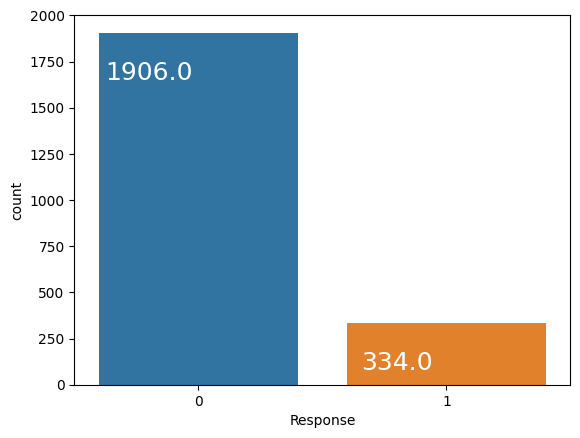

In [ ]:
# Observations on response
response = sns.countplot(x='Response', data=EDA_df)
for p in response.patches:
    response.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

* 1906 customers responded NO in the last campaign whereas 334 customers responded YES

**Complain**

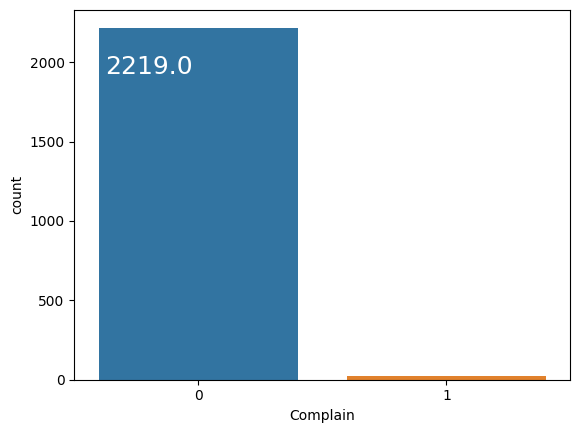

In [ ]:
# Observations on complains made by customers for the last 2 years
response = sns.countplot(x='Complain', data=EDA_df)
for p in response.patches:
    response.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

*  2219 customers did not complain in the last 2 years whereas 21 customers filed for complain

**Kidhome**

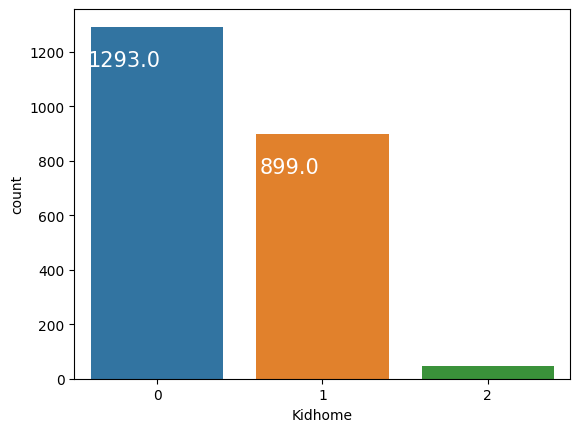

In [ ]:
# Observations on complains made by customers for the last 2 years
response = sns.countplot(x='Kidhome', data=EDA_df)
for p in response.patches:
    response.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=15)

**Teenhome**

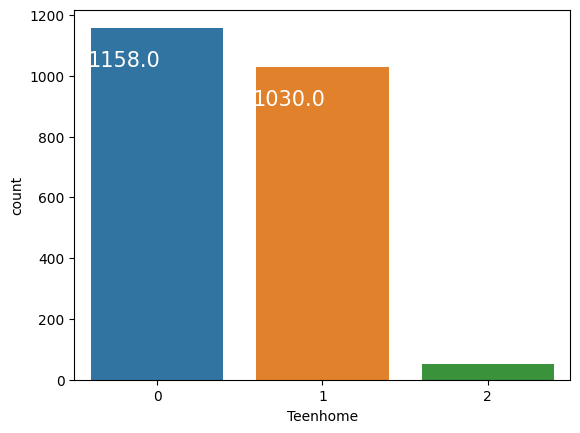

In [ ]:
# Observations on complains made by customers for the last 2 years
response = sns.countplot(x='Teenhome', data=EDA_df)
for p in response.patches:
    response.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=15)

* 0 number of small children and teenagers have the most number of observations 
* These 2 factors can be correlated with customer's purchasing order

In [ ]:
# combining boxplot and histogram at the same scale

def box_hist(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.55)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax_hist2.axvline(
        data[feature].median(), color='cyan', linestyle='dashed', linewidth=2)

**MntWines, MntGoldProds, MntMeatProducts, MntFruits, MntFishProducts, MntSweetProducts**

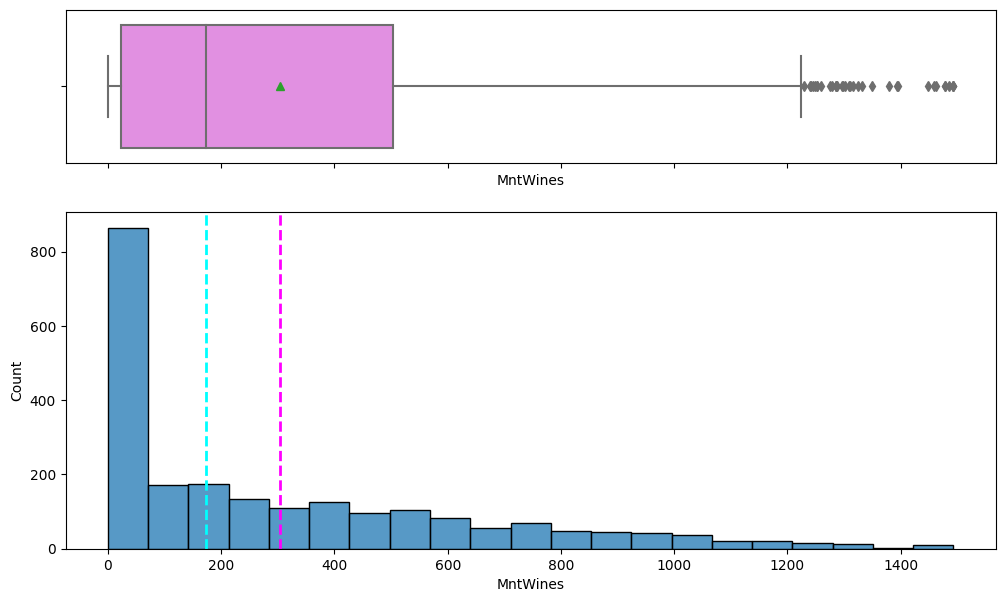

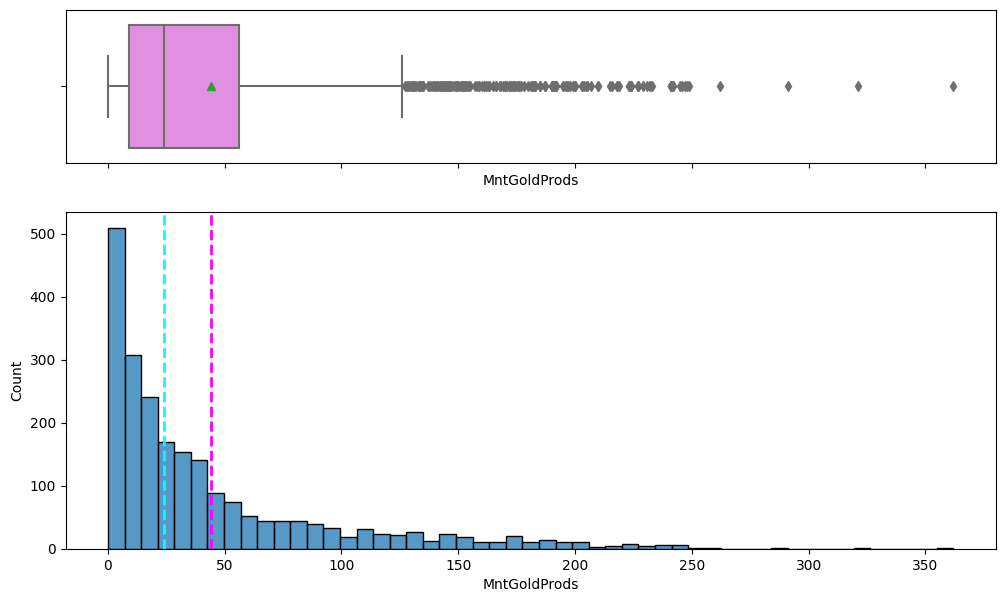

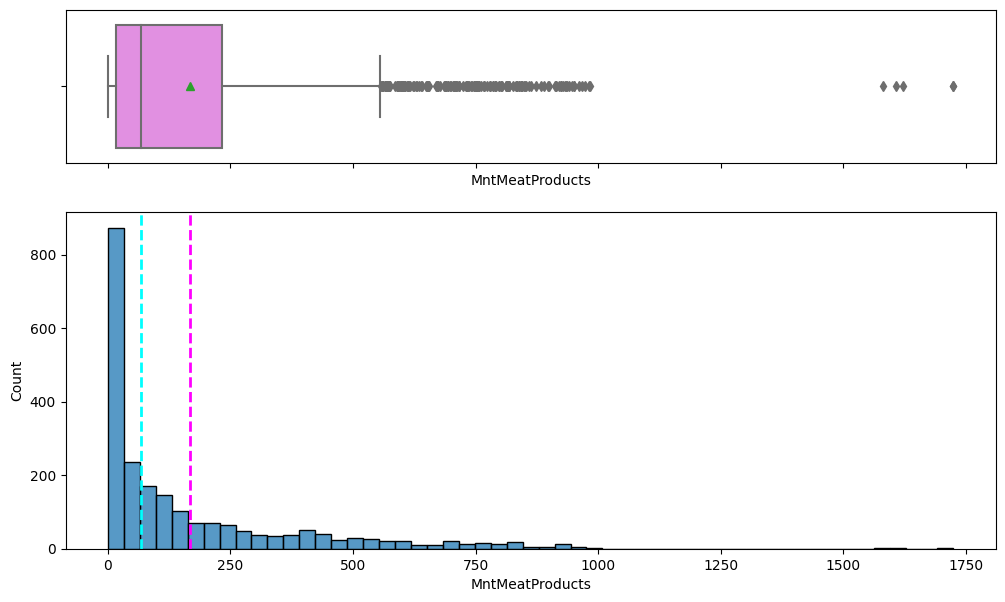

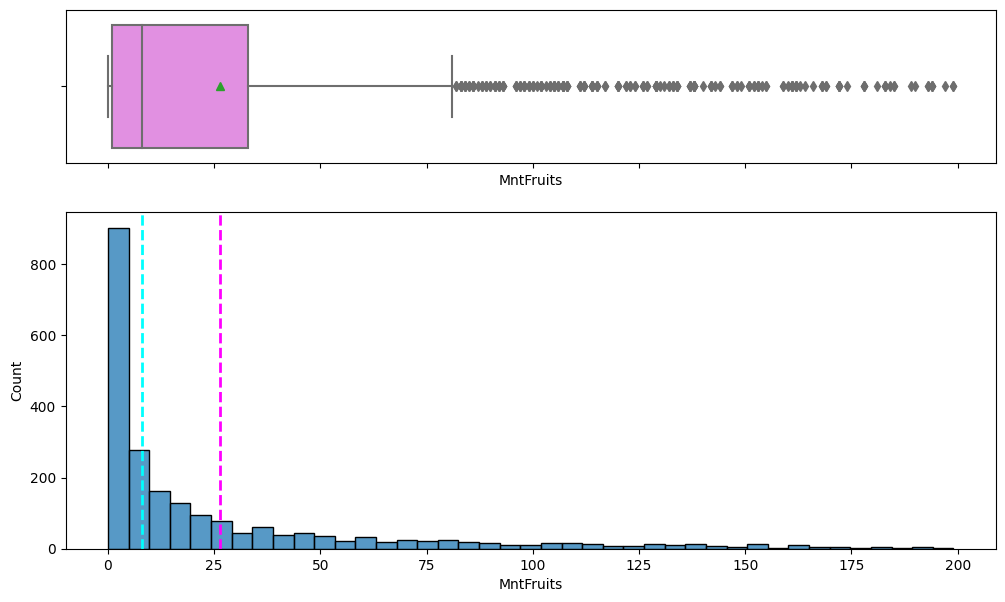

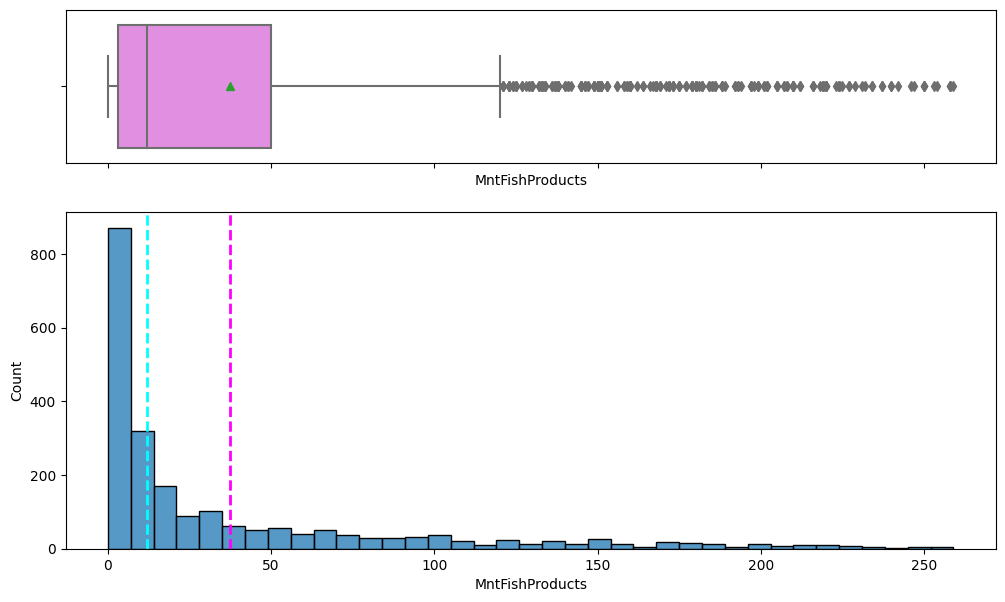

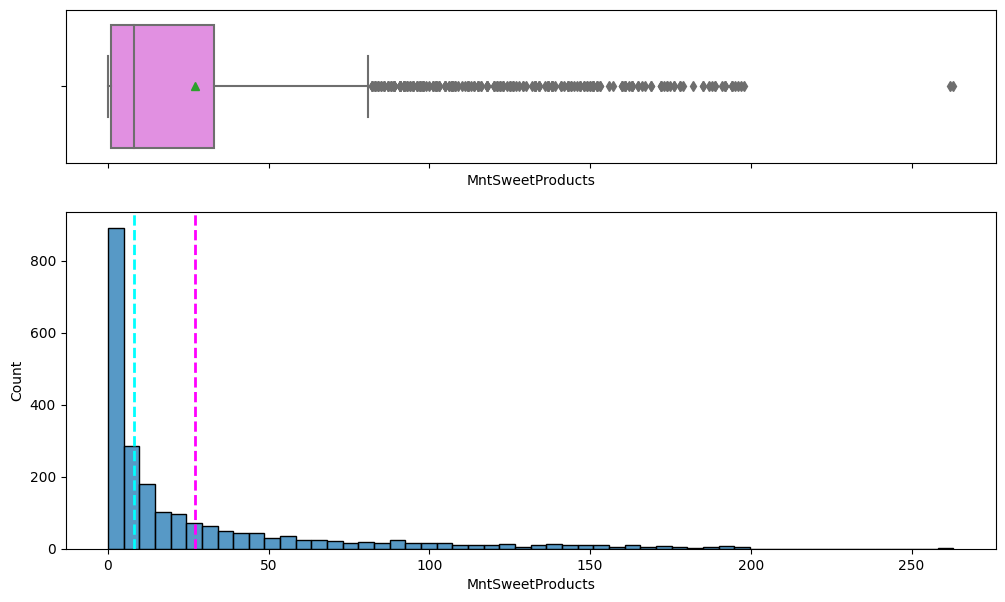

In [ ]:
# observations on MntWines, MntGoldProds, MntMeatProducts, MntFruits, MntFishProducts, MntSweetProducts
box_hist(df, "MntWines")
box_hist(df, "MntGoldProds")
box_hist(df, "MntMeatProducts")
box_hist(df, "MntFruits")
box_hist(df, "MntFishProducts")
box_hist(df, "MntSweetProducts")

* The distribution for the amount spent on all products are all skewed to the right.
* As the median of the distribution in wine products is less than 200, more than 50% of customers have spent less than 200.
* There are some observed outliers. Not going to treat them as some variation is always expected in real-world scenarios for variables like amount spent.


<ipython-input-21-22d0ef9693eb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = EDA_df.corr()


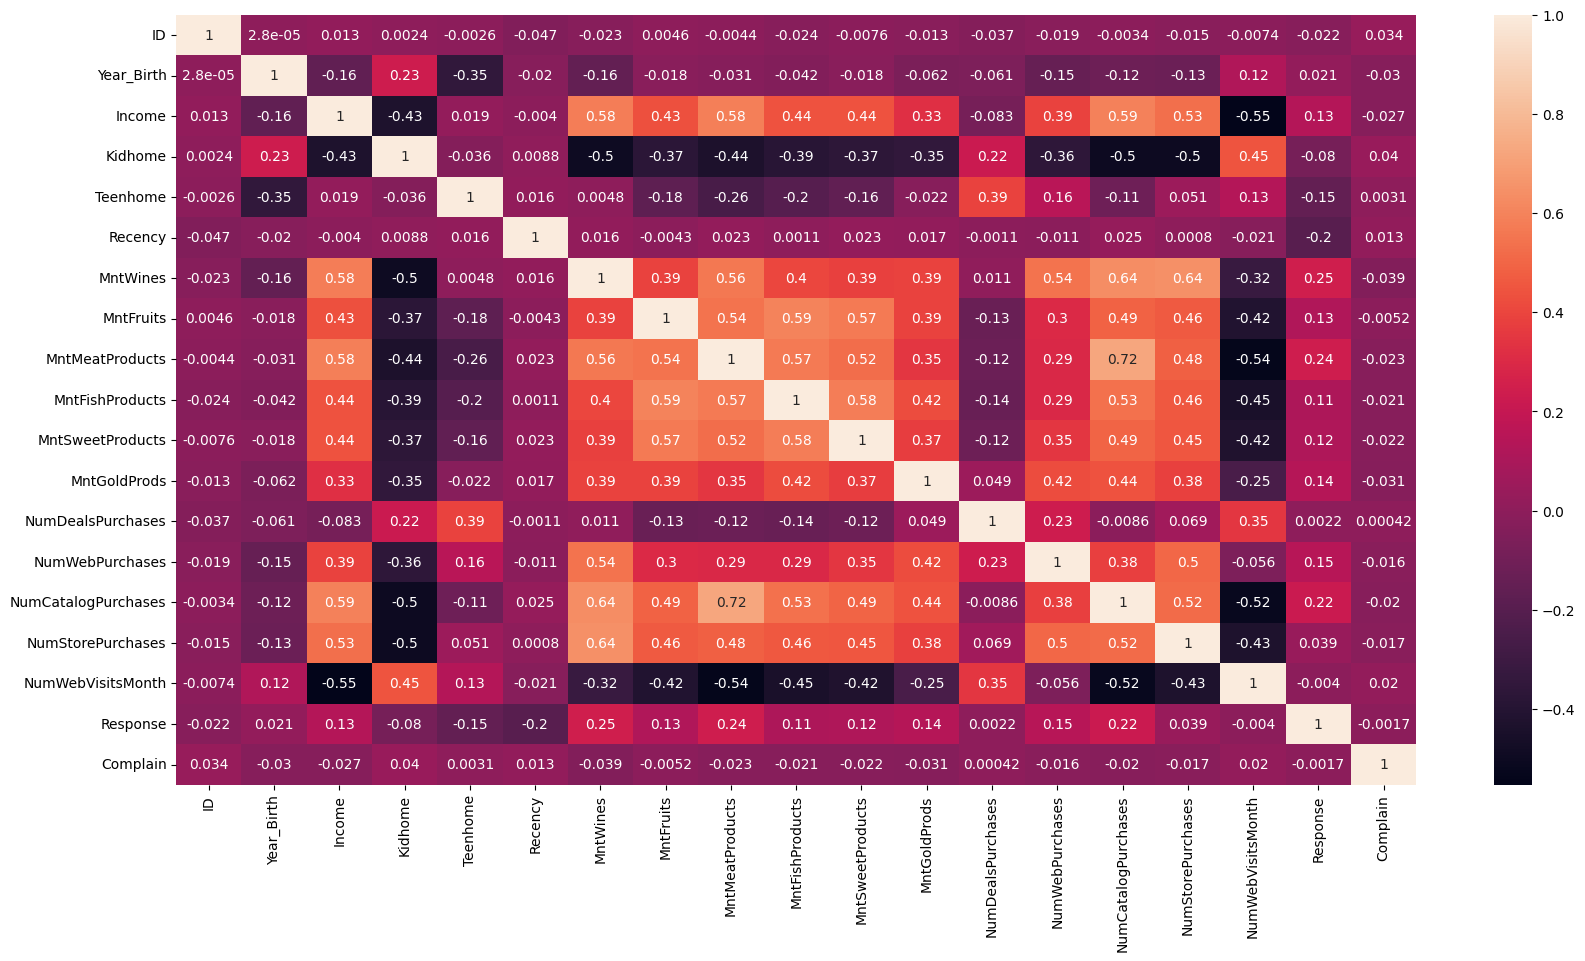

In [ ]:
# Visualize the correlation between numerical variables
fig=plt.figure(figsize=(20,10))
corr_matrix = EDA_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


* Number of purchases is positively correlated with income which can be expected as customers with higher income might spend more than customers with lower income.

**Income**

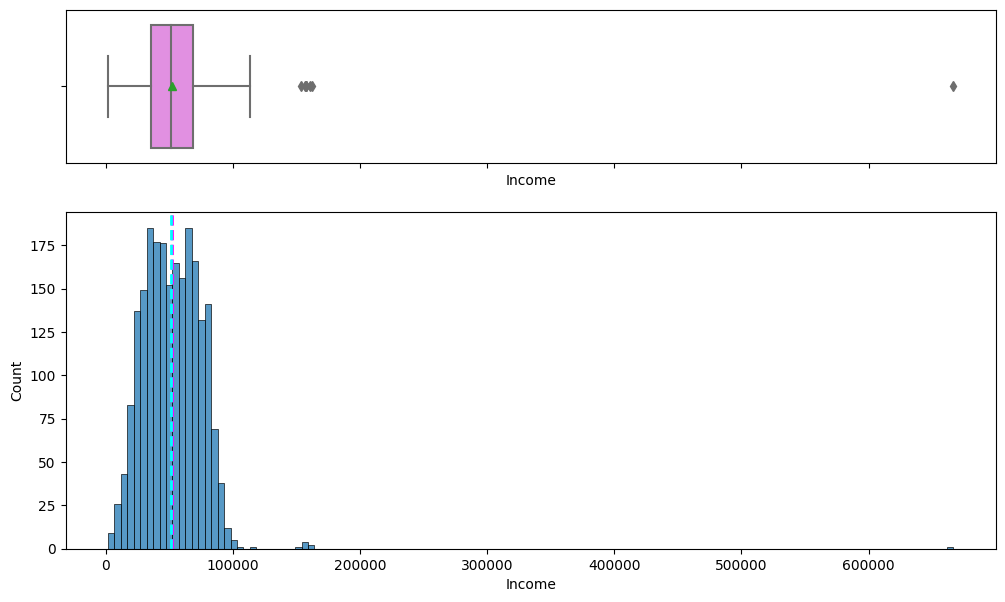

In [ ]:
# observations on Income
box_hist(EDA_df, "Income")

* The average customer's yearly household income is 52,247 and the median is 51,382.
* Outliers were observed

NumDealsPurchases, NumWebPurchases,	NumCatalogPurchases,	NumStorePurchases,	NumWebVisitsMonth

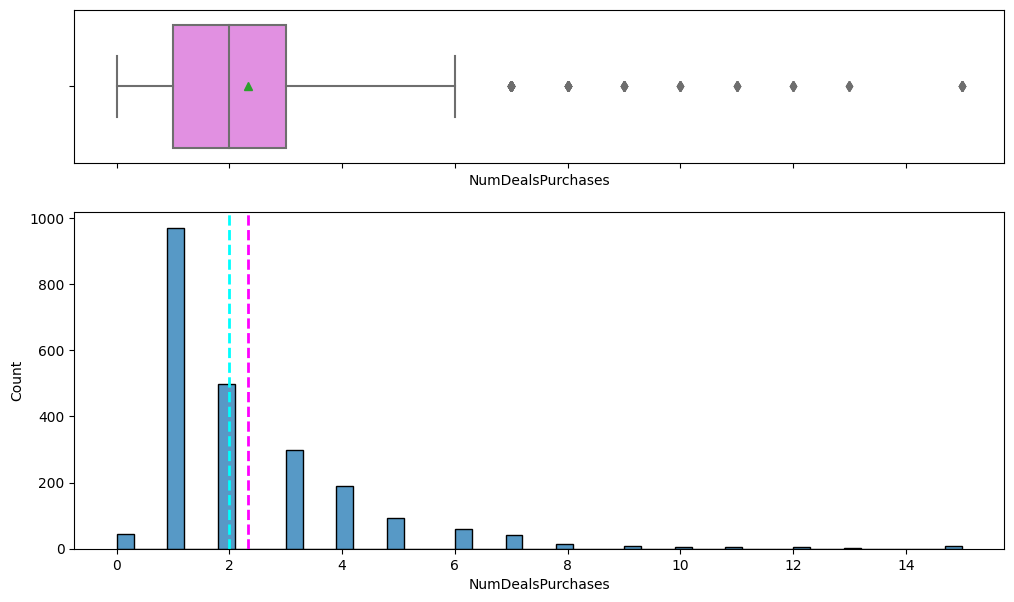

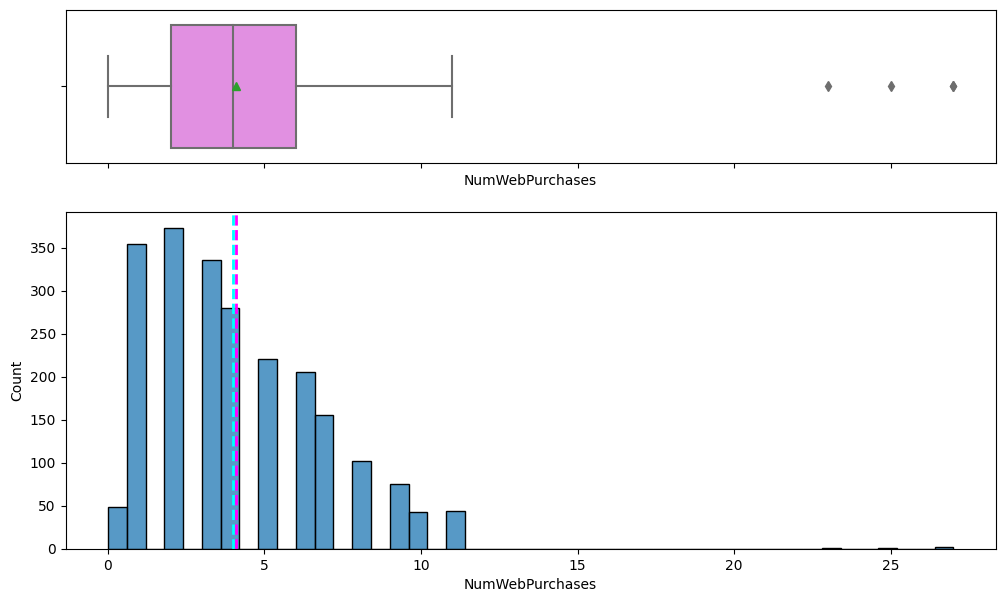

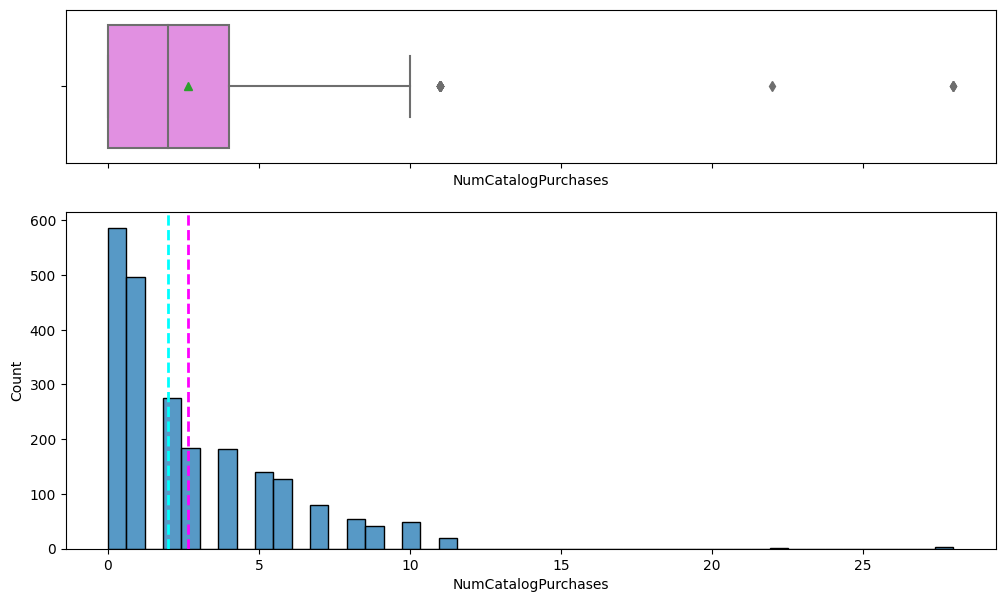

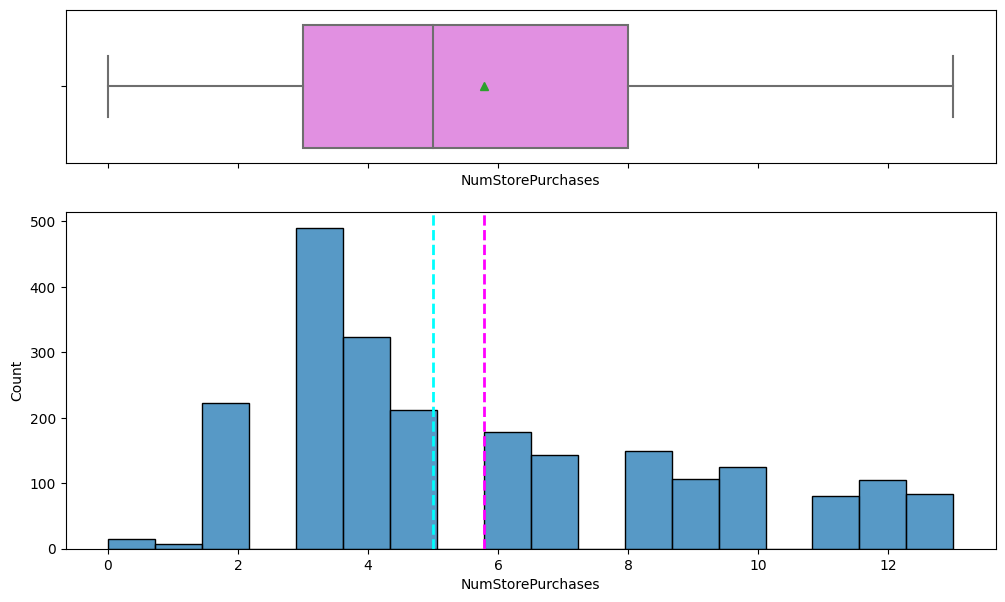

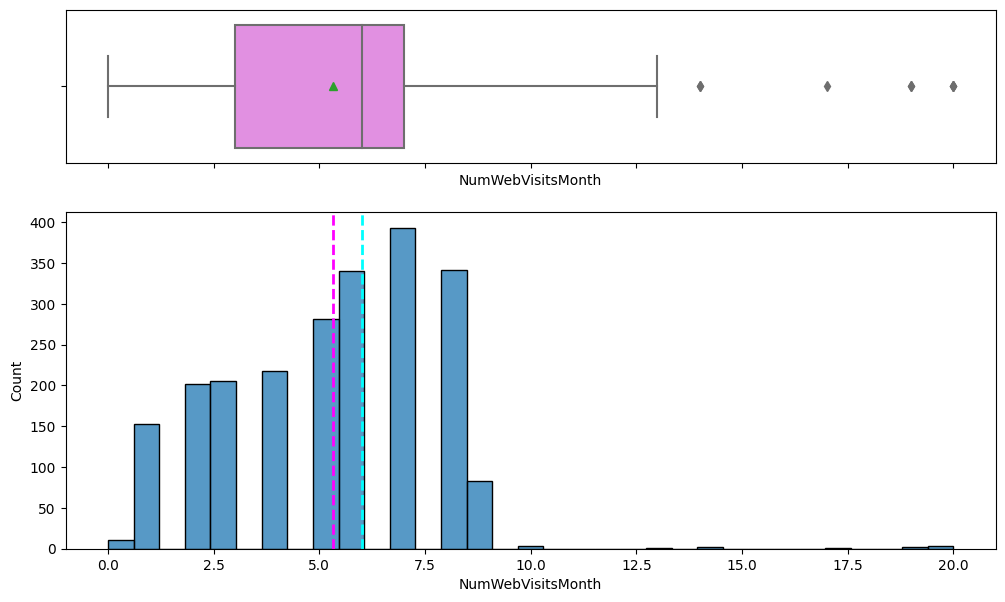

In [ ]:
# observations on NumDealsPurchases, NumWebPurchases,	NumCatalogPurchases,	NumStorePurchases,	NumWebVisitsMonth
box_hist(df, "NumDealsPurchases")
box_hist(df, "NumWebPurchases")
box_hist(df, "NumCatalogPurchases")
box_hist(df, "NumStorePurchases")
box_hist(df, "NumWebVisitsMonth")

* Majority of the customers have 2 or less than 2 deal purchases.
We can see that there some extreme observations in the variable

* The median of the distribution is 4 i.e. 50% of customers have 4 or less than 4 web purchases

* 0 number catalog purchases has the most number of observations. The median is at 2 and 50% of customers have 2 or less than 2 catalog purchases

* No observed outliers from NumStorePurchases. There are very few observations with less than 2 purchases from the store. Most of the customers have 4 or 5 purchases from the store

* The distribution for the number of web visits in a month is skewed and has some outliers at the right end.


**Recency**

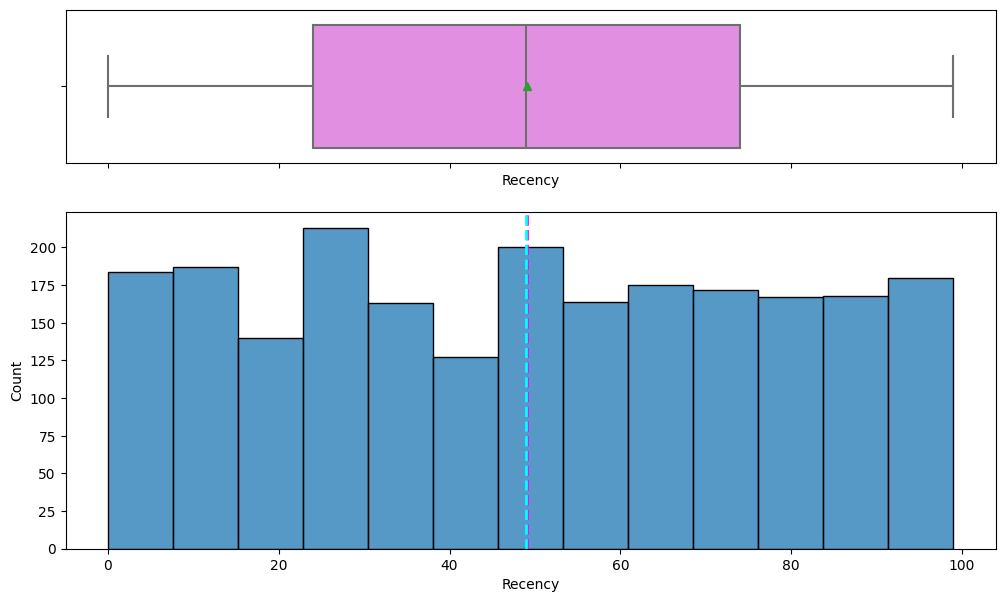

In [ ]:
# observations on Recency
box_hist(EDA_df, "Recency")

* The average number of days since the last purchase is 49 days 
* No outliers found and the distribution is fairly symmetric and uniformly distributed

## Data Preparation

Feature Engineering

In [ ]:
prep_df = EDA_df.copy()

Dt_customer

In [ ]:
# Dt_customer from object to datetime dtype
prep_df.Dt_Customer = prep_df.Dt_Customer.apply(lambda x : pd.to_datetime(str(x)))

In [ ]:
# extracting registration month and year from Dt_customer
prep_df["reg_year"] = prep_df["Dt_Customer"].apply(lambda x: x.year)
prep_df["reg_month"] = prep_df["Dt_Customer"].apply(lambda x: x.month)

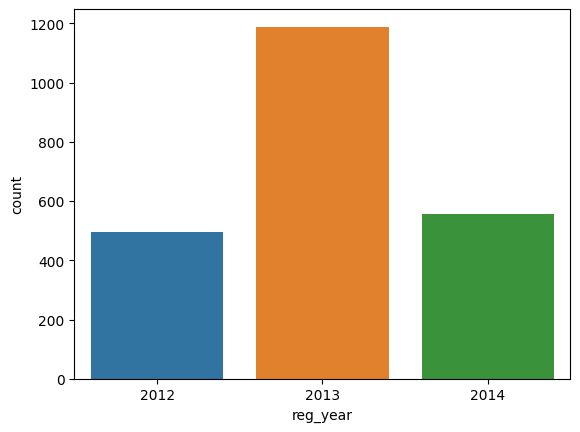

In [ ]:
reg_year = sns.countplot(x='reg_year', data= prep_df)
for p in response.patches:
    response.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

* The number of customers registered is highest in the year 2013. 

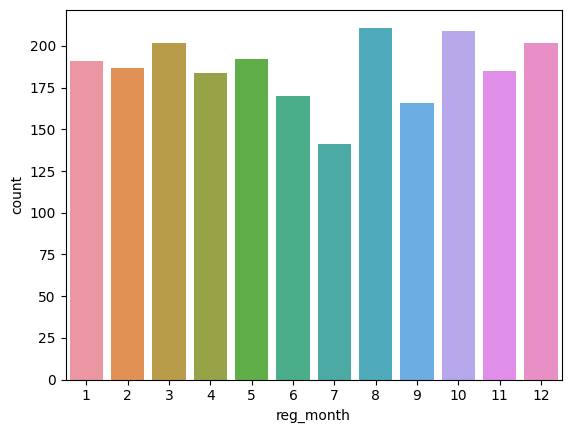

In [ ]:
reg_month = sns.countplot(x='reg_month', data= prep_df)
for p in response.patches:
    response.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

* The highest number of registration in months were observed in March, May, August, October

Age

In [ ]:
# convert strings values to dates first to use subtraction
prep_df["Age"] = 2023 - pd.to_datetime(prep_df["Year_Birth"], format="%Y").apply(lambda x: x.year)

In [ ]:
# getting the age of each costumers
prep_df[prep_df["Age"] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,reg_year,reg_month,Age
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,1,1,0,2,4,0,0,2014,5,130
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,4,6,4,1,0,0,2013,9,124
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,1,2,5,0,1,2013,9,123


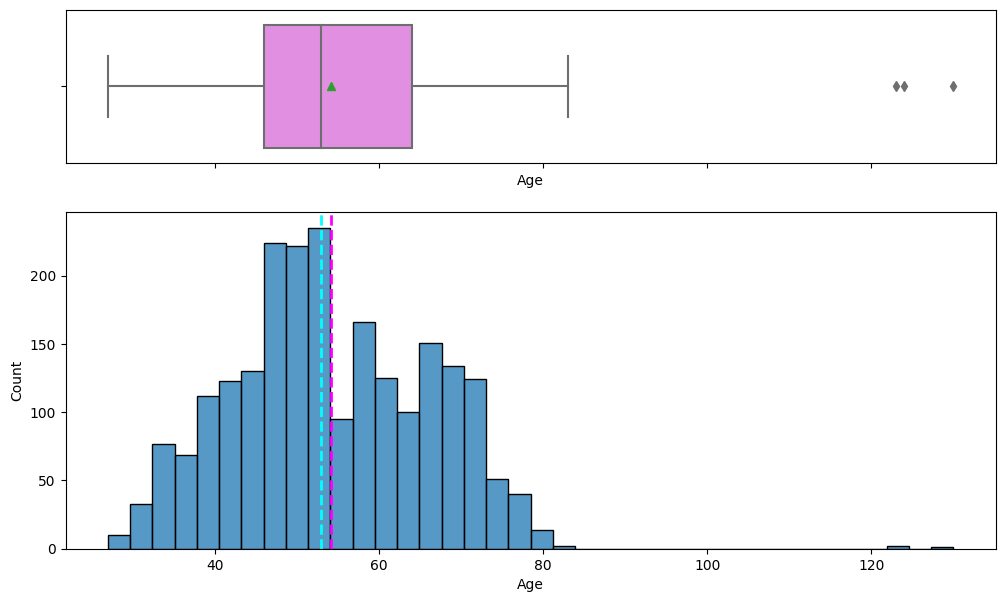

In [ ]:
# Observations on Customer_age
box_hist(prep_df, "Age")

Education

In [ ]:
# Replacing 2n Cycle with Master
prep_df["Education"] = prep_df["Education"].replace("2n Cycle", "Master")

Marital Status

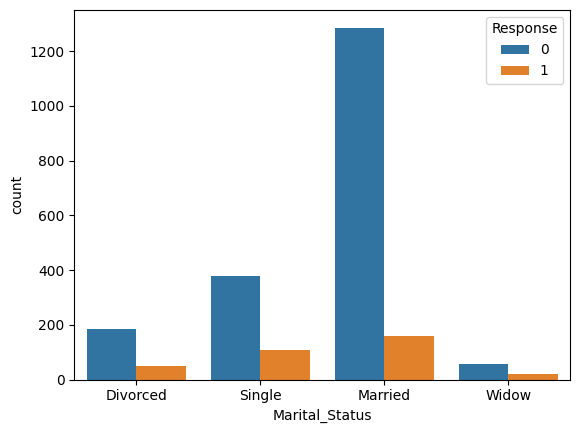

In [ ]:
# combining Absurb, Alone, and YOLO with Single 
# combining Together with Married

prep_df["Marital_Status"] = prep_df["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], "Single")
prep_df["Marital_Status"] = prep_df["Marital_Status"].replace(["Together"], "Married")

marital_status = sns.countplot(x='Marital_Status', data= prep_df, hue="Response")
for p in response.patches:
    response.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

* Majority of the customers are married and responded YES from the last campaign

Amount Spent by Customers

In [ ]:
# total amount of spent by each customer in the last 2 years
prep_df["total_amount_spent"] = prep_df[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

Education vs Total Amount Spent

<Axes: xlabel='Education', ylabel='total_amount_spent'>

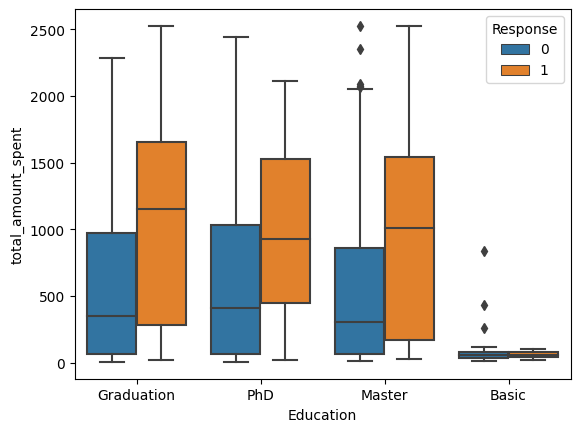

In [ ]:
sns.boxplot(y="total_amount_spent", x="Education", data=prep_df, hue= "Response", orient="vertical")

Marital Status vs Total Amount Spent


<Axes: xlabel='Marital_Status', ylabel='total_amount_spent'>

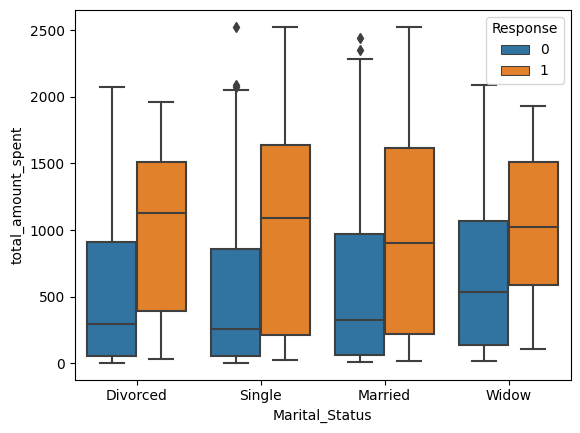

In [ ]:
sns.boxplot(y="total_amount_spent", x="Marital_Status", data=prep_df, hue="Response", orient="vertical")

Kidhome vs Total Amount Spent

<Axes: xlabel='Kidhome', ylabel='total_amount_spent'>

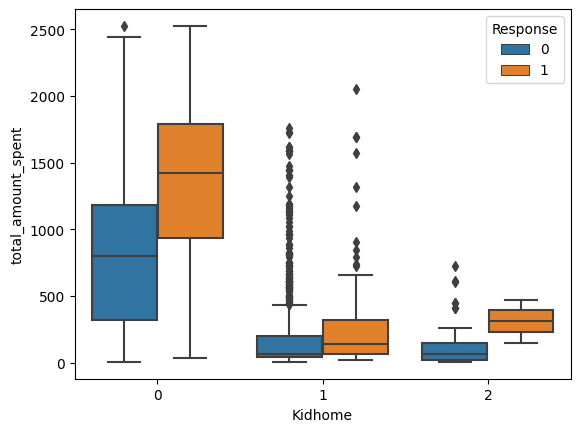

In [ ]:
sns.boxplot(y="total_amount_spent", x="Kidhome", data=prep_df, hue="Response", orient="vertical")

Teenhome vs Total Amount Spent

<Axes: xlabel='Teenhome', ylabel='total_amount_spent'>

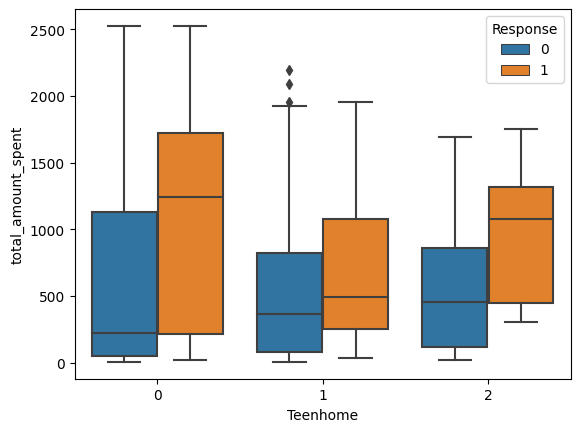

In [ ]:
sns.boxplot(y="total_amount_spent", x="Teenhome", data=prep_df, hue="Response", orient="vertical")

Total Amount Spent vs Year

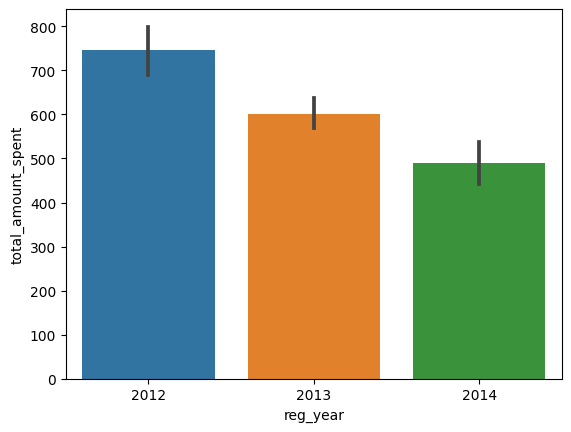

In [ ]:
sns.barplot(x='reg_year', y='total_amount_spent', data= prep_df)
for p in response.patches:
    response.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

* Total amount spent has decreased over the years.

In [ ]:
prep_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,reg_year,reg_month,Age,total_amount_spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,4,6,1,1,0,2014,6,53,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,3,7,5,1,0,2014,6,62,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,3,2,5,2,0,0,2014,5,65,251
3,1386,1967,Graduation,Married,32474.0,1,1,2014-11-05,0,10,...,1,0,2,7,0,0,2014,11,56,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,3,1,2,7,1,0,2014,8,34,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,5,2,11,4,0,0,2013,7,47,689
2236,5263,1977,Master,Married,31056.0,1,0,2013-01-22,99,5,...,1,0,3,8,0,0,2013,1,46,55
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,6,1,5,8,0,0,2012,3,47,309
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,5,4,10,3,0,0,2012,11,45,1383


In [ ]:
# Dropping birth year and Dt_Customer columns
prep_df.drop(
    columns=[
        "ID",
        "Dt_Customer",
    ],
    inplace=True,
)

## Train various models 

In [ ]:
train_df = prep_df.copy()

In [ ]:
# separating target variable and other variables
X = train_df.drop(columns="Response")
X = pd.get_dummies(X)

Y = train_df["Response"]

In [ ]:
# splitting data into training, validation and test set:

X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)


X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)


print(X_train.shape, X_val.shape, X_test.shape)

(1344, 29) (448, 29) (448, 29)


Missing-Value Treatment


In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Year_Birth                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
Complain                   0
reg_year                   0
reg_month                  0
Age                        0
total_amount_spent         0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Widow       0
dtype: int64
------------------------------
Year_Birth                 0
Income                     0
Kidhome                    0
Teenhome                   0

Model evaluation Metric: RECALL

In [ ]:
scorer = metrics.make_scorer(metrics.recall_score)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)  

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
  
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Building Initial Models

To begin, we can create multiple models using KFold and cross_val_score techniques, and then select the best model to optimize using GridSearchCV or RandomizedSearchCV.

When we use Stratified K-Folds cross-validation, the dataset is divided into k consecutive folds (by default, without shuffling) and the distribution of the target variable is maintained within each fold. This approach ensures that each fold is representative of the entire dataset, and each fold is used once as validation while the remaining k-1 folds form the training set.

In [ ]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.255
Random forest: 0.16499999999999998
GBM: 0.31999999999999995
Adaboost: 0.335
dtree: 0.475

Validation Performance:

Bagging: 0.26865671641791045
Random forest: 0.34328358208955223
GBM: 0.29850746268656714
Adaboost: 0.40298507462686567
dtree: 0.3582089552238806
CPU times: user 7.67 s, sys: 2.16 ms, total: 7.68 s
Wall time: 7.73 s


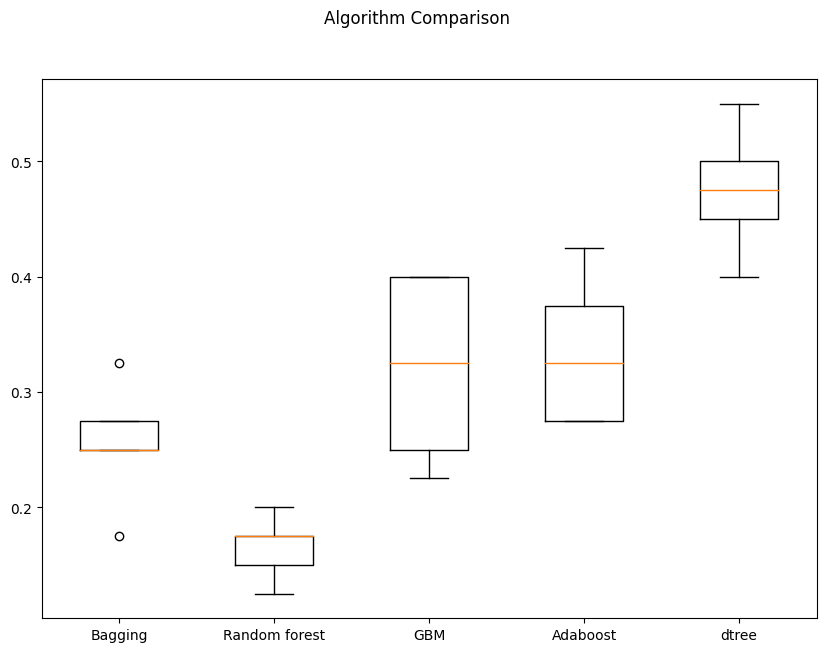

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Based on the performance metrics provided, it appears that the Decision Tree model had the best performance on the training dataset, with a cross-validation score of 0.475. However, on the validation dataset, the Adaboost model had the best performance, with a score of 0.402. The Random Forest and GBM models also performed well on the validation dataset, with scores of 0.343 and 0.299, respectively.

Certain models are not doing well based because it's possible that some models may be underperforming because their hyperparameters have not been optimized.

It's important to note that these performance metrics alone may not provide a complete picture of how well the models are performing. Other factors, such as the size and quality of the dataset, the complexity of the models, and the specific problem being solved, may also influence model performance.

## Tune models using grid/random search or using statistical analysis


Finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. In order to optimize our Adaboost, dtree, and GBM models, we will employ two methods of hyperparameter tuning: GridSearchCV and RandomizedSearchCV. We will then compare the performance and computational time of these two methods to determine which is more efficient for our models.

### Adaboost

GridSearchCV

In [ ]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'learning_rate': 1, 'n_estimators': 50} 
Score: 0.40499999999999997
CPU times: user 4.31 s, sys: 457 ms, total: 4.76 s
Wall time: 3min 12s


In [ ]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=30,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

In [ ]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("training performance:")
Adaboost_grid_train

training performance:


,Accuracy,Recall,Precision,F1
0,0.940476,0.72,0.857143,0.782609


In [ ]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("validation performance:")
Adaboost_grid_val

validation performance:


,Accuracy,Recall,Precision,F1
0,0.848214,0.432836,0.491525,0.460317


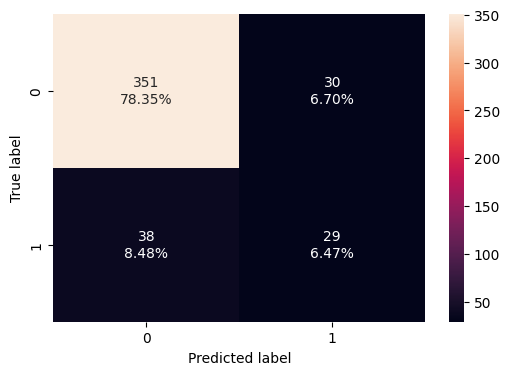

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

The training performance of the model appears to be quite good, with an accuracy of 0.940, a recall of 0.72, a precision of 0.857, and an F1 score of 0.783. This suggests that the model is able to accurately predict the class of the majority of the observations in the training dataset.

However, the validation performance of the model is lower, with an accuracy of 0.848, a recall of 0.433, a precision of 0.492, and an F1 score of 0.460. This suggests that the model may not be generalizing well to new, unseen data. There may be some overfitting to the training data or other issues with the model that are causing the lower performance on the validation set.

RandomizedSearchCV

In [ ]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters are {'n_estimators': 50, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.40499999999999997:
CPU times: user 1.73 s, sys: 203 ms, total: 1.93 s
Wall time: 1min 24s


In [ ]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=20,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=20, random_state=1)

In [ ]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("training performance:")
Adaboost_random_train

training performance:


,Accuracy,Recall,Precision,F1
0,0.974702,0.88,0.946237,0.911917


In [ ]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("validation performance:")
Adaboost_random_val

validation performance:


,Accuracy,Recall,Precision,F1
0,0.841518,0.373134,0.462963,0.413223


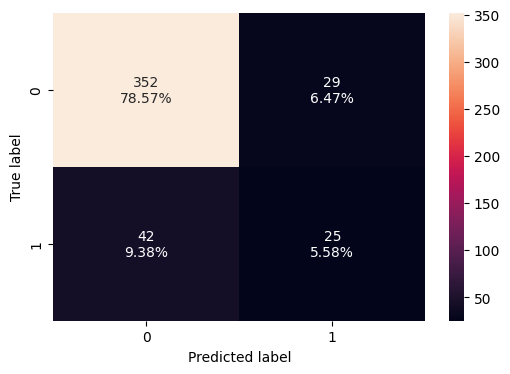

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

For RandomizedSearchCV, the model's performance on the training dataset is quite good, achieving an accuracy of 0.975, recall of 0.88, precision of 0.946, and F1 score of 0.912. This indicates that the model is able to accurately predict the class for a majority of the observations in the training dataset.

However, the model's performance on the validation dataset is not as good, with an accuracy of 0.842, recall of 0.373, precision of 0.463, and F1 score of 0.413. This suggests that the model may have difficulty generalizing to new, unseen data. The model may be overfitting to the training data or experiencing other issues, leading to its lower performance on the validation set. 


### Gradient Boosting (GBM)

GridSearchCV

In [ ]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={
            "n_estimators": np.arange(25,100,25),
            "learning_rate": [0.2,0.01, 0.05, 1],
            "subsample":[0.2,0.3,0.4,0.5],
            "max_features":[0.5,0.6,0.7,0.8]}

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid, scoring=scorer, n_jobs = -1, cv=5)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'learning_rate': 1, 'max_features': 0.8, 'n_estimators': 75, 'subsample': 0.3} with CV score=0.555:
CPU times: user 3.39 s, sys: 264 ms, total: 3.66 s
Wall time: 1min 56s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=1,
    n_estimators=50,
    subsample=0.2
)

tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=50,
                           random_state=1, subsample=0.2)

In [ ]:
gbm_grid_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train, y_train
)
print("training performance:")
gbm_grid_train

training performance:


,Accuracy,Recall,Precision,F1
0,0.761905,0.41,0.288732,0.338843


In [ ]:
gbm_grid_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
print("validation performance:")
gbm_grid_val

validation performance:


,Accuracy,Recall,Precision,F1
0,0.763393,0.343284,0.270588,0.302632


The training performance of the model appears to be okay, with an accuracy of 0.762, a recall of 0.41, a precision of 0.289, and an F1 score of 0.339. This suggests that the model is able to predict the class of the majority of the observations in the training dataset, but the precision is relatively low.

However, the validation performance of the model is similar, with an accuracy of 0.763, a recall of 0.343, a precision of 0.271, and an F1 score of 0.303. This suggests that the model is not overfitting to the training data and is able to generalize to new, unseen data to some extent. However, the precision and F1 score are still relatively low, indicating that there may be room for improvement in the model's performance.

RandomSearchCV

In [ ]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={
            "n_estimators": np.arange(50,150,25),
            "learning_rate": [0.2,0.01, 0.05, 1],
            "subsample":[0.3,0.4,0.5,0.7,0.6],
            "max_features":[0.3,0.4,0.5,0.6,0.7]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.3, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.4999999999999999:
CPU times: user 1.46 s, sys: 150 ms, total: 1.61 s
Wall time: 56.3 s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=1,
    n_estimators=75,
    subsample=0.3
)

tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=75,
                           random_state=1, subsample=0.3)

In [ ]:
gbm_random_train= model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
print("training performance:")
gbm_random_train

training performance:


,Accuracy,Recall,Precision,F1
0,0.855655,0.43,0.518072,0.469945


In [ ]:
gbm_random_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
print("validation performance:")
gbm_random_val

validation performance:


,Accuracy,Recall,Precision,F1
0,0.794643,0.358209,0.328767,0.342857


The training performance of the GBM model appears to be reasonably good, with an accuracy of 0.856, a recall of 0.43, a precision of 0.518, and an F1 score of 0.47. This suggests that the model is able to accurately predict the class of a large proportion of the observations in the training dataset.

However, the validation performance of the model is somewhat lower, with an accuracy of 0.795, a recall of 0.358, a precision of 0.329, and an F1 score of 0.343. This suggests that the model may not be generalizing well to new, unseen data. There may be some overfitting to the training data or other issues with the model that are causing the lower performance on the validation set.

### Decision Tree (dtree)

GridsearchCV

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=dtree_estimator, param_grid=parameters, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'max_depth': 10, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 3} with CV score=0.05500000000000001:


In [ ]:
# building model with best parameters
dt_tuned_grid = DecisionTreeClassifier(
     max_depth= 10,
    min_samples_leaf= 3,
    max_leaf_nodes= 5,
    min_impurity_decrease= 0.0001,
)

# Fit the model on training data
dt_tuned_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, min_samples_leaf=3)

In [ ]:
dt_grid_train = model_performance_classification_sklearn(
    dt_tuned_grid, X_train, y_train
)
print("training performance:")
dt_grid_train

training performance:


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Recall,Precision,F1
0,0.85119,0.0,0.0,0.0


In [ ]:
dt_grid_val = model_performance_classification_sklearn(
    dt_tuned_grid, X_val, y_val
)
print("validation performance:")
dt_grid_val

validation performance:


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Recall,Precision,F1
0,0.850446,0.0,0.0,0.0


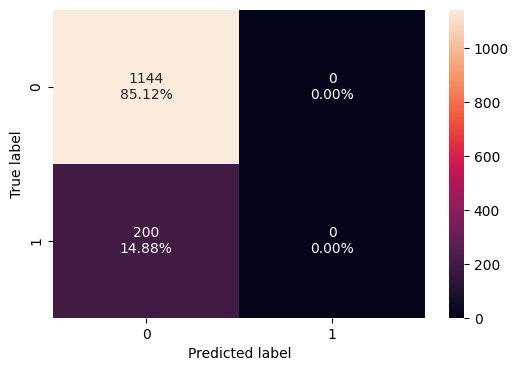

In [ ]:
confusion_matrix_sklearn(dt_tuned_grid, X_train, y_train)

The decision tree model with grid search has not predicted any instances as positive for both the training and validation datasets. This is indicated by the recall, precision, and F1 score being 0.0. 

In terms of accuracy, the model achieves an accuracy of around 0.85, which means that it's able to correctly predict the outcome for 85% of the instances in both the training and validation datasets. However, accuracy alone is not always a good metric for evaluating the performance of a model, especially when dealing with imbalanced datasets or when different types of errors have different costs.

RandomSearchCV

In [ ]:
%%time 

# defining model
model = DecisionTreeClassifier(random_state=1)


# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1,2,3, 4, 7],
    "max_leaf_nodes": [10, 15,20],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 4, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 20, 'max_depth': 4} with CV score=0.26:
CPU times: user 387 ms, sys: 64.2 ms, total: 451 ms
Wall time: 9.51 s


In [ ]:
# building model with best parameters
dt_tuned = DecisionTreeClassifier(
     max_depth= 5,
    min_samples_leaf= 2,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.001,
)

# Fit the model on training data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=2)

In [ ]:
## To check the performance on training set
dt_random_train = model_performance_classification_sklearn(
    dt_tuned, X_train, y_train
)
print("training performance:")
dt_random_train

training performance:


,Accuracy,Recall,Precision,F1
0,0.887649,0.465,0.678832,0.551929


In [ ]:
## To check the performance on validation set
dt_random_val = model_performance_classification_sklearn(
    dt_tuned, X_val, y_val
)
print("validation performance:")
dt_random_train

validation performance:


,Accuracy,Recall,Precision,F1
0,0.887649,0.465,0.678832,0.551929


The model achieved an accuracy of approximately 0.888 on both the training and validation datasets. This suggests that the model is able to correctly classify around 88.8% of the instances in both the training and validation datasets. The model achieved a recall of 0.465, precision of 0.679, and F1 score of 0.552 on both the training and validation datasets. 

Overall, these results suggest that the decision tree model with random search is performing reasonably well.

### Model Performance Comparison and Final Model Selection 

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        gbm_grid_train.T,
        gbm_random_train.T,
        dt_grid_train.T,
        dt_random_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost_GridSearchCV",
    "AdaBoost_RandomizedSearchCV",
    "GBM_GridSearchCV",
    "GBM_RandomizedSearchCV",
    "Decision Tree_GridSearchCV",
    "Decision Tree_RandomizedSearchCV",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost_GridSearchCV,AdaBoost_RandomizedSearchCV,GBM_GridSearchCV,GBM_RandomizedSearchCV,Decision Tree_GridSearchCV,Decision Tree_RandomizedSearchCV
Accuracy,0.940476,0.974702,0.761905,0.855655,0.85119,0.887649
Recall,0.720000,0.880000,0.410000,0.430000,0.00000,0.465000
Precision,0.857143,0.946237,0.288732,0.518072,0.00000,0.678832
F1,0.782609,0.911917,0.338843,0.469945,0.00000,0.551929


From the table, we can see that the AdaBoost model tuned with Random search outperformed the model tuned with Grid search. Similarly, the Gradient Boosting model tuned with Random search performed better than the one tuned with Grid search. On the other hand, the Decision Tree model tuned with Random search showed better performance than the one tuned with Grid search.

Overall, RandomizedSearchCV seemed to perform better than GridSearchCV in terms of finding better hyperparameters for the models.

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        Adaboost_grid_val.T,
        Adaboost_random_val.T,
        gbm_grid_val.T,
        gbm_random_val.T,
        dt_grid_val.T,
        dt_random_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
 "AdaBoost_GridSearchCV",
    "AdaBoost_RandomizedSearchCV",
    "GBM_GridSearchCV",
    "GBM_RandomizedSearchCV",
    "Decision Tree_GridSearchCV",
    "Decision Tree_RandomizedSearchCV",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost_GridSearchCV,AdaBoost_RandomizedSearchCV,GBM_GridSearchCV,GBM_RandomizedSearchCV,Decision Tree_GridSearchCV,Decision Tree_RandomizedSearchCV
Accuracy,0.848214,0.841518,0.763393,0.794643,0.850446,0.852679
Recall,0.432836,0.373134,0.343284,0.358209,0.000000,0.253731
Precision,0.491525,0.462963,0.270588,0.328767,0.000000,0.515152
F1,0.460317,0.413223,0.302632,0.342857,0.000000,0.340000


AdaBoost model tuned with GridSearchCV achieved an accuracy of 0.848214, a recall of 0.432836, a precision of 0.491525, and an F1 score of 0.460317. Similarly, the Decision Tree model tuned with RandomizedSearchCV achieved an accuracy of 0.852679, a recall of 0.253731, a precision of 0.515152, and an F1 score of 0.340000.

Looking at the training performance, it seems that AdaBoost_RandomizedSearchCV has the highest accuracy, recall, precision, and F1 score. However, we should be cautious of overfitting, as the validation performance might differ significantly from the training performance.

Comparing the validation performance, we see that Decision Tree tuned with RandomizedSearchCV have the highest accuracy, while AdaBoosttuned with GridSearchCV and AdaBoos tuned with RandomizedSearchCV have slightly lower accuracy but higher precision and F1 scores. GBM models seem to have the lowest performance in terms of accuracy, recall, precision, and F1 score.

Therefore, considering both the training and validation performance, AdaBoosttuned with GridSearchCV and AdaBoosttuned with RandomizedSearchCV seem to be the best models for prediction, as they have relatively high accuracy, precision, and F1 score in both training and validation sets.

Let's check the final model's performance on the test set.

In [ ]:
# Calculating different metrics on the test set
adaboost_grid_test = model_performance_classification_sklearn(adb_tuned1, X_test, y_test)
print("test performance:")
adaboost_grid_test

test performance:


,Accuracy,Recall,Precision,F1
0,0.857143,0.402985,0.529412,0.457627


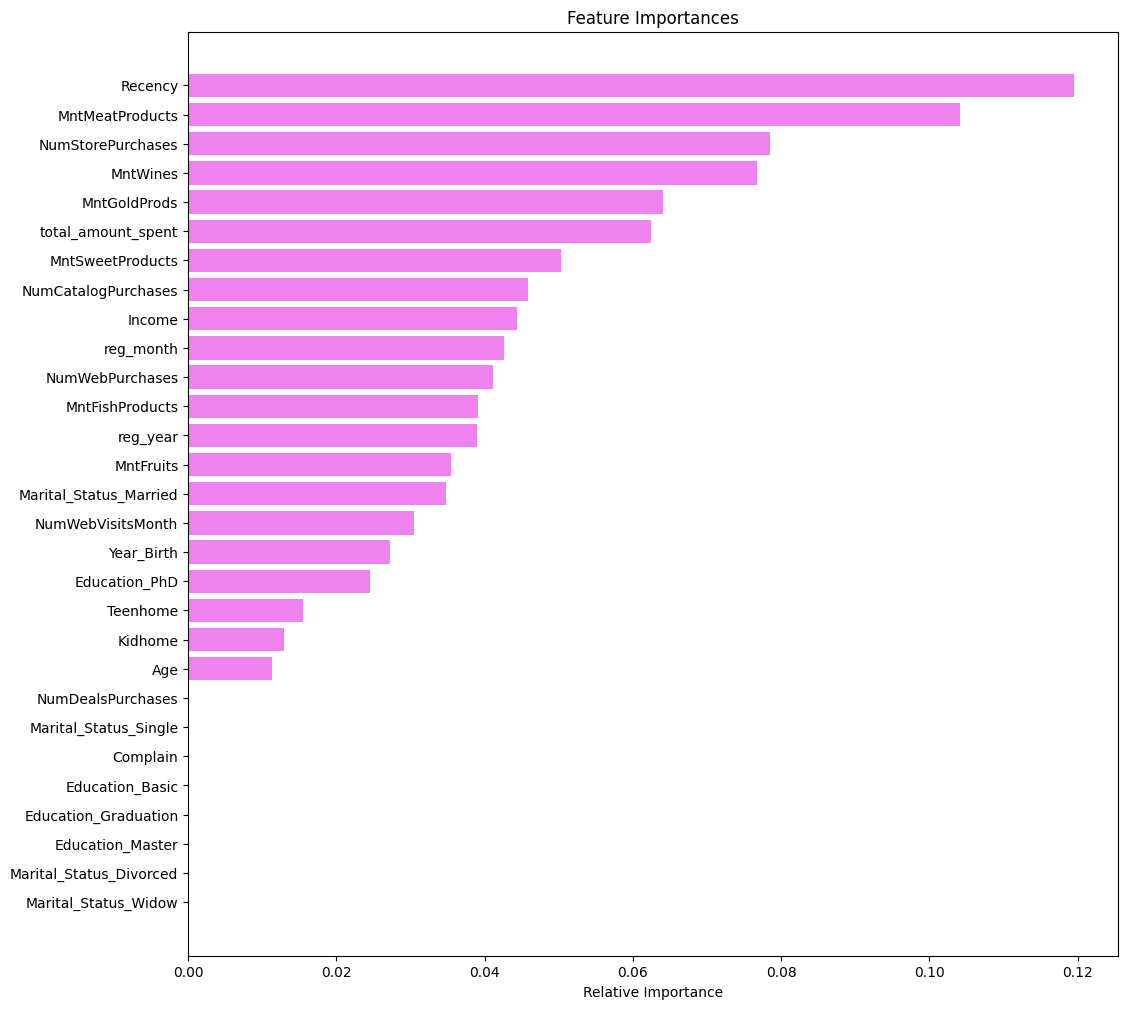

In [ ]:
#checking the feature performance
feature_names = X.columns
importances = adb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Recency is the most important feature, followed by amount spent on meat products in the last 2 years and number of purchases made directly in stores


## Provide recommendations to the business

* Total amount spent has decreased over the years, which shows that either the quality of products has declined or the company lacks marketing strategies
The company should constantly improve its marketing strategies to address such issues
* Customers had no complaints in the last two years, which can be due to the lack of feedback options for customers. The company should create easy mechanisms to gather feedback from the customers and use it to identify major concerns if any
* The company should further launch premium offers for such customers
Such offers can also be extended to customers with higher income
The number of web visits is an important feature and the company should work on customizing its website to direct more traffic to the website
The company can improve the interface and provide easy check-in, check-out, and delivery options
* Launch promos or discounts during months of March, May, August, October. It was observed that highest number of registration in these months. 
* Customers who are frequent buyers should be targeted more by the company and offered added benefits and discounts
* Based on the feature performance from the selected final model - AdaBoost tuned with GridSearchCV, the campaign should target the most recent buyers, customers who purchace meat, winesm gold pructs and customers who purchase directly in store. 

## Conclusion

What are the different factors which affect the target variable?



* To predict whether a customer will respond positively to the offer, you can use the following variables from the data dictionary:

  * Response (target): This is the target variable that you are trying to predict.

  * Complain: This can be used as a predictor variable as it indicates whether the customer had any complaints in the last 2 years, which could be an indicator of their satisfaction with the company's products or services.

  * Education: This can be used as a predictor variable as it indicates the customer's level of education, which could be correlated with their income and purchasing behavior.

  * Marital: This can be used as a predictor variable as it indicates the customer's marital status, which could be correlated with their household size and purchasing behavior.

  * Kidhome: could be correlated with their purchasing behavior.

  * Teenhome: could be correlated with their purchasing behavior.

  * Income: This can be used as a predictor variable as it indicates the customer's yearly household income, which could be a strong indicator of their purchasing power.

  * MntWines, MntGoldProds, MntMeatProducts, MntFruits, MntFishProducts, MntSweetProducts: indicator of the customer's food preferences and purchasing behavior.

  * NumDealsPurchases: This can be used as a predictor variable as it indicates the number of purchases made with discount, indicator of the customer's willingness to take advantage of offers and discounts.

  * NumCatalogPurchases: This can be used as a predictor variable as it indicates the number of purchases made using a catalog, indicator of the customer's purchasing behavior.

  * NumStorePurchases: This can be used as a predictor variable as it indicates the number of purchases made directly in stores, indicator of the customer's purchasing behavior.

  * NumWebPurchases: This can be used as a predictor variable as it indicates the number of purchases made through the company's website, indicator of the customer's purchasing behavior.

  * NumWebVisitsMonth: This can be used as a predictor variable as it indicates the number of visits to the company's website in the last month,an indicator of the customer's interest in the company's products and services.

  * Recency: This can be used as a predictor variable as it indicates the number of days since the customer's last purchase, an indicator of the customer's engagement with the Supermarket


* How can we improve model performance using hyperparameter tuning and prevent data leakage using pipelines while building a model to predict the response of a customer? 


  * Choose an appropriate evaluation metric: Start by identifying the evaluation metric that you want to optimize for. This could be accuracy, precision, recall, F1-score, or any other metric that aligns with your project's goals.

  * Identify hyperparameters: Next, identify the hyperparameters of the model that you want to optimize. 

  * Perform hyperparameter tuning: Use the chosen algorithm to perform hyperparameter tuning. This involves training multiple models with different combinations of hyperparameters and selecting the one that performs the best on the evaluation metric.

To prevent data leakage while building a model to predict the response of a customer, you can use pipelines. Here's how:


  * Split the data: Split your data into training and testing sets before applying any preprocessing steps. This ensures that the testing data remains unseen during the training phase.

  * Transform the testing data: Transform the testing data using the fitted pipeline.

  * Train and evaluate the model: Train your model on the preprocessed training data and evaluate its performance on the preprocessed testing data. 

* AdaBoosttuned with GridSearchCV and AdaBoosttuned with RandomizedSearchCV seem to be the best models for classifying whether customers will reply with a positive response or not, as they have relatively high accuracy, precision, and F1 score in both training and validation sets.